In [1]:
!date


Wed Mar 30 06:54:39 MDT 2016


In [2]:
import numpy as np, pymc as pm, seaborn as sns
%matplotlib inline
pm.__version__

/Users/blarsen/miniconda3/envs/python3/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


'2.3.6'

In [3]:
# Code that defines the prior: p(a,b)∝(a+b)^(−5/2)
@pm.stochastic
def ab(power=-2.5, value=[1.,1.]):
    if np.any(value <= 0):
        return -np.Inf
    return power * np.log(value[0]+value[1])

a = ab[0]
b = ab[1]

In [4]:
# simulate data, so we can test

N_cities = 5
N_trials = pm.rdiscrete_uniform(10, 20, size=N_cities)
N_yes = pm.rbinomial(N_trials, .1)

In [6]:
theta   = pm.Beta("theta", alpha=a, beta=b)

# Binomials that share a common prior
bins = dict()
for i in range(N_cities):
    bins[i] = pm.Binomial('bin_{}'.format(i), p=theta, n=N_trials[i], value=N_yes[i], observed=True)

mcmc = pm.MCMC([ab, bins, theta])

In [7]:
mcmc.sample(100000, 50000, 50)


 [-----------------100%-----------------] 100000 of 100000 complete in 15.6 sec

Plotting ab_0
Plotting ab_1
Plotting theta


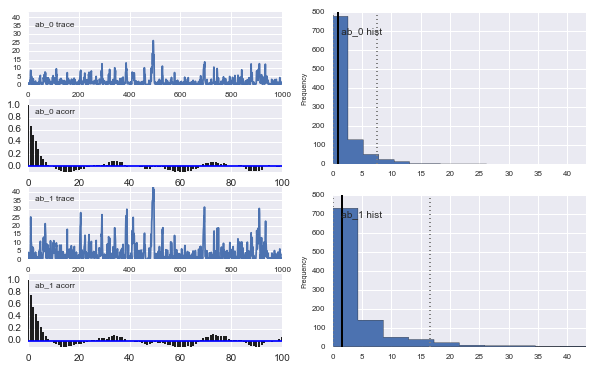

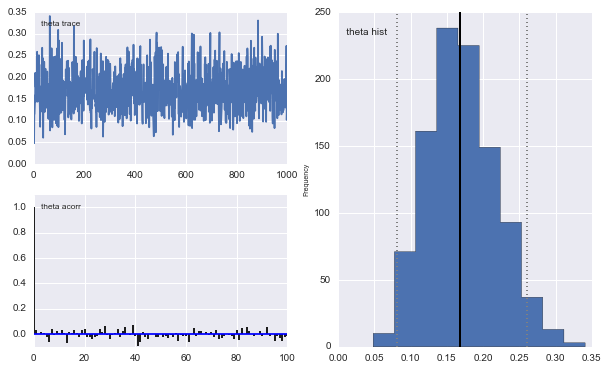

In [8]:
pm.Matplot.plot(mcmc)
